In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(10)

#DATA

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Examples

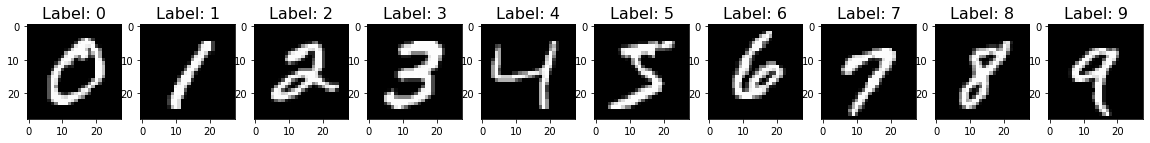

In [ ]:
num_classes = 10
f, ax = plt.subplots(1,  num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [ ]:
# for i in range(0, 10):
  # print(y_train[i])

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# print("Train")
# for i in range(0, 1):
#   print(y_train[i])

# print("Test")
# for i in range(0, 1):
#   print(y_test[i])

# Prepare Data

In [ ]:
# Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
                        
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


# Model - FCNN

In [ ]:
model = Sequential()
model.add(Dense(input_shape=(784,), units=128, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=('accuracy'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_12 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


# Train

In [ ]:
batch_size = 512
epochs = 10
model.fit(x=x_train, y=y_train, batch_size=512, epochs=10)

Epoch 1/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0437 - accuracy: 0.9869
Epoch 2/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0415 - accuracy: 0.9874
Epoch 3/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0369 - accuracy: 0.9886
Epoch 4/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0312 - accuracy: 0.9906
Epoch 5/10
118/118 [==============================] - 1s 11ms/step - loss: 0.0276 - accuracy: 0.9918
Epoch 6/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0259 - accuracy: 0.9919
Epoch 7/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0233 - accuracy: 0.9928
Epoch 8/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0220 - accuracy: 0.9933
Epoch 9/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0193 - accuracy: 0.9943
Epoch 10/10
118/118 [==============================] - 1s 10ms/step - loss: 0.0174 - accura

# Evaluate

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 0s 1ms/step - loss: 0.0717 - accuracy: 0.9800
Test loss: 0.07168833911418915, Test Accuracy: 0.9800000190734863


In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred, y_pred_classes)

[[6.13897271e-08 1.51779830e-07 5.60510534e-06 ... 9.99983191e-01
  1.02054692e-07 1.01745331e-06]
 [2.77999346e-10 1.47945150e-06 9.99998450e-01 ... 1.13271739e-10
  6.87586965e-09 2.08149612e-17]
 [4.88223577e-07 9.99836206e-01 8.04902811e-06 ... 1.34392285e-05
  1.17678101e-04 3.10278466e-07]
 ...
 [1.79589000e-11 2.22071206e-09 1.88878156e-13 ... 2.35209896e-08
  9.77603998e-10 8.75081838e-08]
 [7.71793924e-13 2.48747203e-13 8.61234302e-14 ... 6.66794839e-14
  3.93920601e-07 3.38856208e-14]
 [1.60239374e-11 2.28552610e-13 6.08736762e-14 ... 1.57124595e-17
  2.82596793e-11 6.55083370e-16]] [7 2 1 ... 4 5 6]


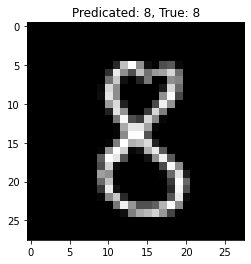

In [ ]:
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]

y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicated: {}, True: {}".format(y_sample_pred_class, y_sample_true, frozenset=16))
plt.imshow(x_sample.reshape(28,28), cmap='gray')

# Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

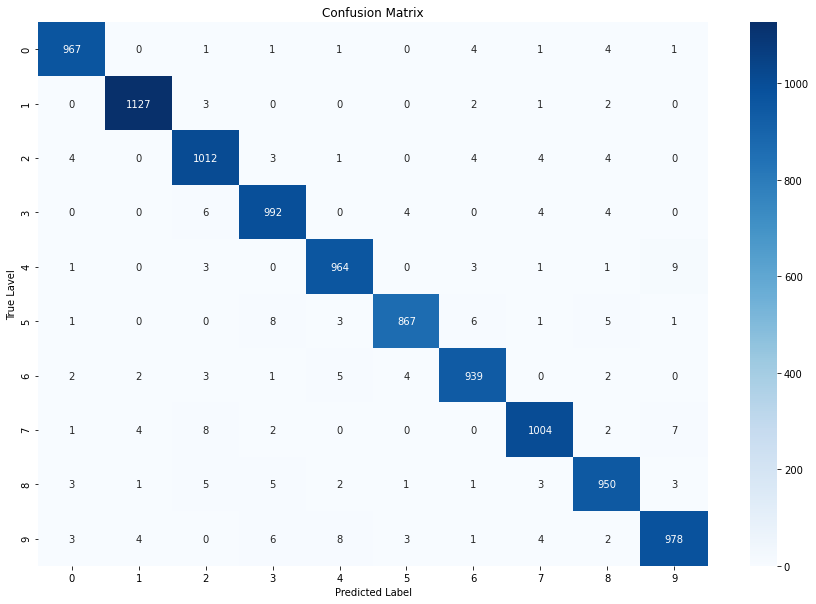

In [ ]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Lavel')
ax.set_title('Confusion Matrix')

# Investigate Some Errors

In [ ]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

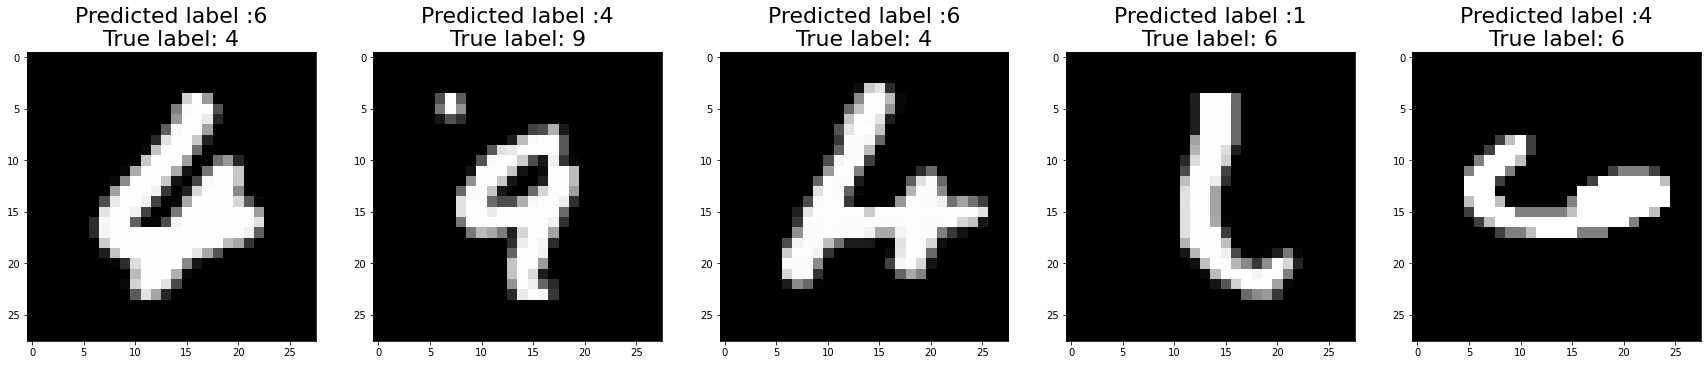

In [ ]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # 5 last ones

# Show Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)
